![](https://media.giphy.com/media/H4DjXQXamtTiIuCcRU/giphy.gif)

#### So,let's begin...

- **Method 1 :** [Label encoding](#1)
- **Method 2 :** [OnHot encoding](#2)
- **Method 3 :** [Feature Hashing](#3)
- **Method 4 :** [Encoding categories with dataset statistics](#4)
- **Cyclic features :** [Encoding cyclic features](#6)
- **Method 5:** [Target Encoding](#7)
- **Method 6 :** [K-Fold target encoding](#8)
- **Summary :** [Summary of model performance](#5)

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import base

/home/sobanda/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train=pd.read_csv('./features/train.csv')
df_test=pd.read_csv('./features/test.csv')

In [3]:
print('train data set has got {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))
print('test data set has got {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))


train data set has got 300000 rows and 25 columns
test data set has got 200000 rows and 24 columns


In [4]:
df_train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

### Defining the train and target

In [5]:
X=df_train.drop(['target'],axis=1)
y=df_train['target']
#X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

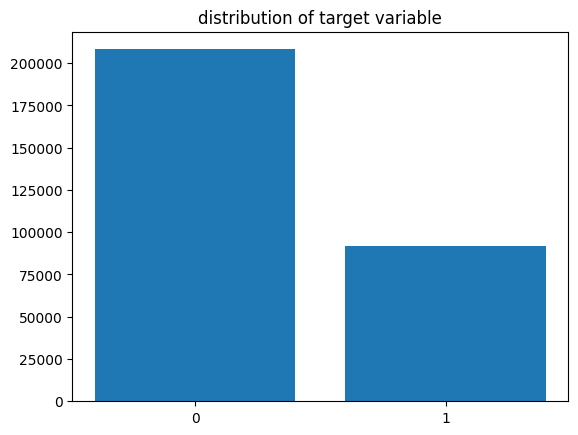

In [9]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

Data variables present in this data:
- **Binary data** : A  binary variable a variable that has only 2 values..ie 0/1
- **Categorical data** : A categorical variable is a variable that can take some limited number of values.for example,day of the week.It can be one of 1,2,3,4,5,6,7 only.
- **Ordinal data** : An ordinal variable is a categorical variable that has some order associated with it.for example,the ratings that are given to a movie by a user.
- **Nominal data** :  Nominal value is a variable that has no numerical importance,such as occupation,person name etc..
- **Timeseries data** : Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that you can look for trends in time.



## Method 1: Label encoding <a id='1'></a>
In this method we change every categorical data to a number.That is each type will be subtuted by a number.for example we will substitute 1 for Grandmaster,2 for master ,3 for expert etc..
For implementing this we will first import *Labelencoder* from  *sklearn* module.

In [21]:
from sklearn.preprocessing import LabelEncoder

Now we will do these three steps to label encode our data:
- Initialize the labelencoder class
- Call the fit() method to fit the data
- Transform data to labelencoded data

In [23]:
%%time

train=pd.DataFrame()
label=LabelEncoder()
for c in  X.columns:
    if(X[c].dtype=='object'):
        train[c]=label.fit_transform(X[c])
    else:
        train[c]=X[c]
        
train.head(5)    

CPU times: user 793 ms, sys: 16.1 ms, total: 809 ms
Wall time: 808 ms


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,...,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1932,8078,1,1,4,7,17,31,7,2
3,3,0,1,0,0,1,2,4,5,0,...,629,6056,1,2,0,8,3,134,2,1
4,4,0,0,0,0,0,2,4,4,0,...,1760,8231,1,2,2,0,17,158,7,8


Here you can see the label encoded output train data.We will check the shape of train data now and verify that there is no change in the number of columns.

In [14]:

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))


train data set has got 300000 rows and 24 columns


### Logistic regression

In [12]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    print('Accuracy : ',accuracy_score(y_test,y_pre))


In [16]:
logistic(train,y)

Accuracy :  0.69065


## Method 2 : On hot encoding  <a id='2'></a>
Our second method is encoding each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column. Here is a little example:   


![](https://miro.medium.com/max/878/1*WXpoiS7HXRC-uwJPYsy1Dg.png)

To implement on-hot encoding we will use *get_dummies()* function in *pandas*.



In [13]:
#train=pd.get_dummies(X).astype(np.int8)
#print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))



This produces output as a pandas dataframe.Alternatively we can use *OneHotEncoder()* method available in* sklearn* to convert out data to on-hot encoded data.But this method produces a sparse metrix.The advantage of this methos is that is uses very less memory/cpu resourses.
To do that,we need to :
- Import OneHotEncoder from sklean.preprocessing
- Initialize the OneHotEncoder
- Fit and then transform our data

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
#Example

data = pd.DataFrame({  
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']  
})

encoder = OneHotEncoder(sparse=False)

one_hot_encoded = encoder.fit_transform(data[['Color']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Color']))

print(one_hot_df)

   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0


/home/sobanda/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
%%time 

one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316461 columns
CPU times: user 995 ms, sys: 67.8 ms, total: 1.06 s
Wall time: 1.06 s


In [26]:
logistic(train,y)

Accuracy :  0.75715


/home/sobanda/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 3 : Feature hashing (a.k.a the hashing trick)  <a id='3'></a>

Feature hashing is a very cool technique to represent categories in a “one hot encoding style” as a sparse matrix but with a much lower dimensions. In feature hashing we apply a hashing function to the category and then represent it by its indices. for example, if we choose a dimension of 5 to represent “New York” we will calculate H(New York) mod 5 = 3 (for example) so New York representation will be (0,0,1,0,0).

In [27]:
from sklearn.feature_extraction import FeatureHasher

In [32]:
#Example
data = [  
    {'feature1': 'apple', 'feature2': 'red'},  
    {'feature1': 'banana', 'feature2': 'yellow'},  
    {'feature1': 'apple', 'feature2': 'green'},  
    {'feature1': 'orange', 'feature2': 'orange'}  
]
print(data)

[{'feature1': 'apple', 'feature2': 'red'}, {'feature1': 'banana', 'feature2': 'yellow'}, {'feature1': 'apple', 'feature2': 'green'}, {'feature1': 'orange', 'feature2': 'orange'}]


In [30]:

# Here, we can specify the number of features (i.e., the size of the output vector) we want to generate with hashing.
hasher = FeatureHasher(n_features=10)  # Using 10 features as an example

hashed_features = hasher.transform(data)

hashed_array = hashed_features.toarray()

print(hashed_array)


[[ 0.  1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]]


**Explanation of the Output:**

Each row corresponds to an example from the original dataset.
Each column is one of the hashed feature representations.
The values (1s and 0s) indicate the presence or absence of the hashed feature.

**Summary:**

FeatureHasher is a powerful tool for efficiently transforming categorical data into a numerical format while managing memory usage effectively, which can be particularly useful when the number of unique categories is large.



In [33]:
%%time

X_train_hash=X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')      
hashing=FeatureHasher(input_type='string')
train=hashing.transform(X_train_hash.values)

CPU times: user 2.52 s, sys: 135 ms, total: 2.66 s
Wall time: 2.65 s


In [34]:

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))



train data set has got 300000 rows and 1048576 columns


In [35]:
logistic(train,y)

Accuracy :  0.7516833333333334


/home/sobanda/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 4 :Encoding categories with dataset statistics  <a id='4'></a>

 Now we will try to give our models a numeric representation for every category with a small number of columns but with an encoding that will put similar categories close to each other. The easiest way to do it is replace every category with the number of times that we saw it in the dataset. This way if New York and New Jersey are both big cities, they will probably both appear many times in our dataset and the model will know that they are similar.

In [6]:
%%time

import numpy as np  
import pandas as pd  

X_train_stat = X.copy()  

for c in X_train_stat.columns:  
    if X_train_stat[c].dtype == 'object':  
        X_train_stat[c] = X_train_stat[c].astype('category')  
        
        # Get value counts and sort them  
        counts = X_train_stat[c].value_counts().sort_index()  
        counts = counts.fillna(0)  
        
        # Add random noise to counts  
        counts += np.random.rand(len(counts)) / 1000  
        
        # Create a mapping from original category to the noisy counts  
        count_mapping = counts.to_dict()  
        
        # Create a new column that maps the original categories to the noisy counts  
        X_train_stat[c + '_counts'] = X_train_stat[c].map(count_mapping)  

# Now X_train_stat will have the modified categorical columns and their counts
    
        
        

CPU times: user 342 ms, sys: 12.2 ms, total: 354 ms
Wall time: 353 ms


In [11]:
X_train_stat.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_5_counts,nom_6_counts,nom_7_counts,nom_8_counts,nom_9_counts,ord_1_counts,ord_2_counts,ord_3_counts,ord_4_counts,ord_5_counts
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2594.000298,1148.000788,241.000503,271.000811,19.000759,77428.000859,33768.000237,24740.000205,3974.000216,506.000005
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,792.000644,842.000600,287.000973,111.000681,13.000940,77428.000859,22227.000192,35276.000503,18258.000658,2603.000525
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,2524.000061,1169.000516,475.000819,278.000296,29.000784,25065.000358,63908.000621,24740.000205,16927.000930,2572.000686


In [42]:
print('train data set has got {} rows and {} columns'.format(X_train_stat.shape[0],X_train_stat.shape[1]))
        

train data set has got 300000 rows and 41 columns


In [12]:
# Check the data types of the columns  
print(X_train_stat.dtypes)  

# Check for any non-numeric values in the DataFrame  
non_numeric = X_train_stat.select_dtypes(include=['object']).columns  
print("Non-numeric columns:", non_numeric)

id                 int64
bin_0              int64
bin_1              int64
bin_2              int64
bin_3           category
bin_4           category
nom_0           category
nom_1           category
nom_2           category
nom_3           category
nom_4           category
nom_5           category
nom_6           category
nom_7           category
nom_8           category
nom_9           category
ord_0              int64
ord_1           category
ord_2           category
ord_3           category
ord_4           category
ord_5           category
day                int64
month              int64
bin_3_counts    category
bin_4_counts    category
nom_0_counts    category
nom_1_counts    category
nom_2_counts    category
nom_3_counts    category
nom_4_counts    category
nom_5_counts    category
nom_6_counts    category
nom_7_counts    category
nom_8_counts    category
nom_9_counts    category
ord_1_counts    category
ord_2_counts    category
ord_3_counts    category
ord_4_counts    category


Ordinal Encoding is a method used to convert categorical variables into a numerical format that machine learning algorithms can understand. This technique is particularly useful when the categorical data is ordinal, meaning that the categories have a clear ranking or order.

Key Characteristics of Ordinal Encoding
Ordered Categories: Ordinal encoding is used when the categorical values have a natural order. For example:

Education Level: 'High School', 'Bachelor's', 'Master's', 'PhD'.
Satisfaction Rating: 'Unsatisfied', 'Neutral', 'Satisfied'.
Mapping: Each unique category is assigned an integer value based on its rank. For example:

'High School' → 1
'Bachelor's' → 2
'Master's' → 3
'PhD' → 4
Maintain Relationships: By assigning numerical values, ordinal encoding maintains the ordinal relationships existing in the data. In the previous example, it indicates that a PhD is a higher level of education than a Bachelor's.

When to Use Ordinal Encoding
Appropriate for Ordinal Data Only: Since ordinal encoding assumes that the distances between the assigned integer values have meaning (e.g., the difference between 1 and 2 is the same as between 3 and 4), it should only be used for ordered categories.

Simplicity and Interpretability: It can be a simple and effective way to encode categories without inflating the number of features, as would be the case with one-hot encoding.

In [9]:
import pandas as pd  
from sklearn.preprocessing import OrdinalEncoder

# Assuming you have already loaded your DataFrame as X_train_stat  
# Example: X_train_stat = pd.DataFrame(...)  

# Step 1: Check data types of the DataFrame  
print(X_train_stat.dtypes)  

# Step 2: Identify non-numeric columns  
non_numeric = X_train_stat.select_dtypes(include=['category']).columns  
print("Non-numeric columns:", non_numeric)  

# Step 3: Apply Ordinal Encoding to the non-numeric columns  
encoder = OrdinalEncoder()  
X_train_stat[non_numeric] = encoder.fit_transform(X_train_stat[non_numeric])  

# Step 4: Check the data types again to confirm conversion  
print(X_train_stat.dtypes)

id                 int64
bin_0              int64
bin_1              int64
bin_2              int64
bin_3           category
bin_4           category
nom_0           category
nom_1           category
nom_2           category
nom_3           category
nom_4           category
nom_5           category
nom_6           category
nom_7           category
nom_8           category
nom_9           category
ord_0              int64
ord_1           category
ord_2           category
ord_3           category
ord_4           category
ord_5           category
day                int64
month              int64
bin_3_counts    category
bin_4_counts    category
nom_0_counts    category
nom_1_counts    category
nom_2_counts    category
nom_3_counts    category
nom_4_counts    category
nom_5_counts    category
nom_6_counts    category
nom_7_counts    category
nom_8_counts    category
nom_9_counts    category
ord_1_counts    category
ord_2_counts    category
ord_3_counts    category
ord_4_counts    category


In [10]:
X_train_stat = pd.get_dummies(X_train_stat, drop_first=True) 

X_train_stat.head(5)


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_5_counts,nom_6_counts,nom_7_counts,nom_8_counts,nom_9_counts,ord_1_counts,ord_2_counts,ord_3_counts,ord_4_counts,ord_5_counts
0,0,0,0,0,1.0,1.0,1.0,5.0,5.0,3.0,...,200.0,513.0,605.0,2166.0,4535.0,3.0,2.0,9.0,3.0,30.0
1,1,0,1,0,1.0,1.0,1.0,4.0,3.0,5.0,...,68.0,378.0,718.0,900.0,3261.0,3.0,1.0,12.0,22.0,169.0
2,2,0,0,0,0.0,1.0,0.0,4.0,4.0,5.0,...,194.0,517.0,1175.0,2185.0,7195.0,0.0,4.0,9.0,21.0,167.0
3,3,0,1,0,0.0,1.0,2.0,4.0,5.0,0.0,...,90.0,518.0,1105.0,1667.0,10500.0,3.0,3.0,10.0,3.0,168.0
4,4,0,0,0,0.0,0.0,2.0,4.0,4.0,0.0,...,162.0,514.0,1085.0,1702.0,8567.0,3.0,5.0,12.0,21.0,187.0


In [13]:
logistic(X_train_stat,y)

Accuracy :  0.6934833333333333


/home/sobanda/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Encoding cyclic features  <a id='6'></a>
![](https://miro.medium.com/max/343/1*70cevmU8wNggGJEdLam1lw.png)

Some of our features are cyclic in nature.ie day,month etc.

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.



In [14]:
%%time

X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos']].head(3)

CPU times: user 173 ms, sys: 8.98 ms, total: 182 ms
Wall time: 181 ms


,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000


Now we will use OnHotEncoder to encode other variables,then feed the data to our model.

In [17]:
one=OneHotEncoder()

one.fit(X_train_cyclic)
train=one.transform(X_train_cyclic)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))


train data set has got 300000 rows and 316478 columns


In [18]:
logistic(train,y)

Accuracy :  0.7579833333333333


/home/sobanda/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 5 : Target encoding <a id='7'></a>
 		
Target-based encoding is numerization of categorical variables via target. In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.

for example,
<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0</td>
    </tr>
    <tr>
    <td>India</td>
    <td>0</td>
    </tr>
    <tr>
    <td>China</td>
    <td>1</td>
    </tr>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
</table>



Encoding for India = [Number of true targets under the label India/ Total Number of targets under the label India] 
which is 2/3 = 0.66

<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>0.66</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0.5</td>
    </tr>
</table>



In [19]:
%%time

X_target=df_train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values
        
    
    

X_target.head(4)

CPU times: user 3min 56s, sys: 117 ms, total: 3min 56s
Wall time: 3min 56s


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,...,0.368421,2,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432,0
1,1,0,1,0,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,...,0.076923,1,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496,0
2,2,0,0,0,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,...,0.172414,1,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432,0
3,3,0,1,0,0.309384,0.290107,0.351052,0.290054,0.307162,0.339793,...,0.227273,1,0.403885,0.360961,0.330148,0.208354,0.355985,0.322048,0.255729,1


In [29]:
logistic(X_target.drop('target',axis=1),y)

Accuracy :  0.6946166666666667


### K-Fold target encoding <a id='8' ></a>

k-fold target encoding can be applied to reduce the overfitting. In this method, we divide the dataset into the k-folds, here we consider 5 folds. Fig.3 shows the first round of the 5 fold cross-validation. We calculate mean-target for fold 2, 3, 4 and 5 and we use the calculated values, mean_A = 0.556 and mean_B = 0.285 to estimate mean encoding for the fold-1.

![](https://miro.medium.com/max/1955/1*ZKD4eZXzd_FdN0SQDszFVQ.png)

In [30]:
X['target']=y
cols=X.drop(['target','id'],axis=1).columns

In [31]:
%%time

X_fold=X.copy()
X_fold[['ord_0','day','month']]=X_fold[['ord_0','day','month']].astype('object')
X_fold[['bin_3','bin_4']]=X_fold[['bin_3','bin_4']].replace({'Y':1,'N':0,'T':1,"F":0})
kf = KFold(n_splits = 5, shuffle = False, random_state=2019)
for train_ind,val_ind in kf.split(X):
    for col in cols:
        if(X_fold[col].dtype=='object'):
            replaced=dict(X.iloc[train_ind][[col,'target']].groupby(col)['target'].mean())
            X_fold.loc[val_ind,col]=X_fold.iloc[val_ind][col].replace(replaced).values

            

CPU times: user 4min 55s, sys: 1.86 s, total: 4min 57s
Wall time: 4min 57s


In [32]:
X_fold.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,0.327356,0.360281,0.305929,0.24171,...,0.5,0.334926,0.403542,0.259103,0.307031,0.211418,0.412888,0.323473,0.244538,0
1,1,0,1,0,1,1,0.327356,0.290501,0.358107,0.289501,...,0.125,0.278366,0.403542,0.327796,0.208194,0.185704,0.293144,0.341711,0.327219,0
2,2,0,0,0,0,1,0.242135,0.290501,0.293881,0.289501,...,0.166667,0.278366,0.316665,0.402135,0.307031,0.354919,0.208748,0.341711,0.244538,0
3,3,0,1,0,0,1,0.350536,0.290501,0.305929,0.340791,...,0.233333,0.278366,0.403542,0.361036,0.330519,0.211418,0.358066,0.323473,0.255791,1
4,4,0,0,0,0,0,0.350536,0.290501,0.293881,0.340791,...,0.137931,0.278366,0.403542,0.225265,0.208194,0.354919,0.410066,0.341711,0.327219,0


# Summary <a id='5'></a>

Here you can see the summary of our model performance against each of the encoding techniques we have used.
It is clear that OnHotEncoder together with cyclic feature encoding yielded maximum accuracy.

<table style="width : 50%">
    <tr>
    <th>Encoding</th>
    <th>Score</th>
    <th>Wall time</th>
    </tr>
    <tr>
    <td>Label Encoding</td>
    <td>0.692</td>
    <td> 973 ms</td>
    </tr>
    <tr>
    <td>OnHotEncoder</td>
    <td>0.759</td>
    <td>1.84 s</td>
    </tr>
    <tr>
    <td>Feature Hashing</td>
    <td>0.751</td>
    <td>4.96 s</td>
    </tr>
    <tr>
    <td>Dataset statistic encoding</td>
    <td>0.694</td>
    <td>894 ms</td>
    </tr>
    </tr>
    <tr>
    <td>Cyclic + OnHotEncoding</td>
    <td>0.759</td>
    <td>431 ms</td>
    </tr>
    </tr>
    <tr>
    <td>Target encoding</td>
    <td>0.694</td>
    <td>2min 5s</td>
    </tr>
    
</table>
    

**You can try two or more of this approaches together,and encode the dataset in suitable way to acheive higher accuracy**
